In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
from sklearn.metrics import silhouette_samples



In [ ]:
df = pd.read_csv("/content/mcdonalds.csv")

print(df.columns.tolist())

['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [ ]:
dimensions = df.shape
print(dimensions)


(1453, 15)


In [ ]:
first_few_rows = df.head(3)
print(first_few_rows)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
MD_x = df.iloc[:, 0:11].apply(lambda x: (x == "Yes").astype(int))

result = np.round(MD_x.mean(), 2)

print(result)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
MemoryErrorD_x = np.array(MD_x)

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

print("Principal Components:")
print(np.round(pca.components_, decimals=1))
print("\nExplained Variance Ratio:")
print(np.round(pca.explained_variance_ratio_, decimals=1))
print("\nSingular Values:")
print(np.round(pca.singular_values_, decimals=1))

Principal Components:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]

Explained Variance Ratio:
[0.3 0.2 0.1 0.1 0.1 0.1 0.  0.  0.  0.  0. ]

Singular Values:
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


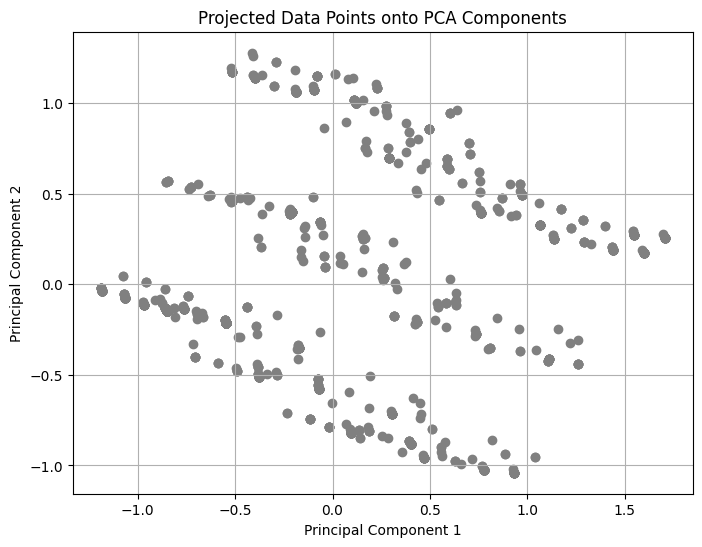

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data Points onto PCA Components')
plt.grid(True)
plt.show()


In [ ]:
np.random.seed(1234)

MD_x = np.array(MD_x)

# Define range of clusters
k_range = range(2, 9)

# Initialize variables to store results
best_silhouette_score = -1
best_kmeans_model = None
best_labels = None

# Iterate over each number of clusters
for k in k_range:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)

    # Evaluate clustering using silhouette score
    silhouette_score = metrics.silhouette_score(MD_x, kmeans.labels_)

    # Print silhouette score for each k (optional)
    print(f"Silhouette score for {k} clusters: {silhouette_score}")

    # Update best model if silhouette score improves
    if silhouette_score > best_silhouette_score:
        best_silhouette_score = silhouette_score
        best_kmeans_model = kmeans
        best_labels = kmeans.labels_
MD_km28_labels = best_labels
cluster_centers = best_kmeans_model.cluster_centers_

Silhouette score for 2 clusters: 0.24441701827275675
Silhouette score for 3 clusters: 0.23282891365502031
Silhouette score for 4 clusters: 0.2580595854833568
Silhouette score for 5 clusters: 0.2613379092677105
Silhouette score for 6 clusters: 0.2534701619798705
Silhouette score for 7 clusters: 0.28156428494916763
Silhouette score for 8 clusters: 0.2961268364149829


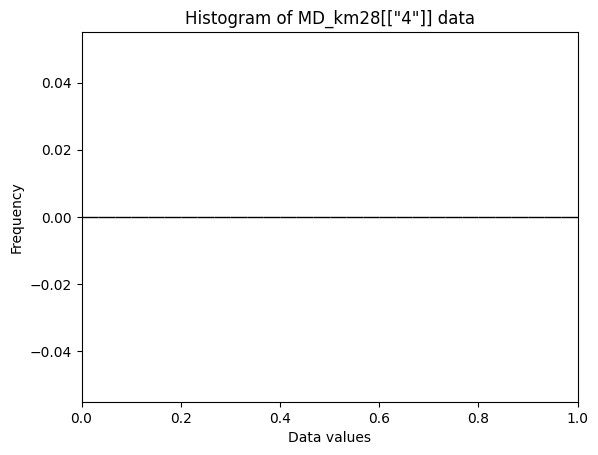

In [ ]:
MD_km28_4 = np.array([cluster_centers ])
MD_x = np.array([cluster_centers ])

# Creating the histogram
plt.hist(MD_x[MD_km28_4 == 4], bins=30, range=(0, 1), edgecolor='black')

# Setting the x-axis limits
plt.xlim(0, 1)

# Adding labels and title (optional)
plt.xlabel('Data values')
plt.ylabel('Frequency')
plt.title('Histogram of MD_km28[["4"]] data')

# Showing the plot
plt.show()